In [1]:
import numpy as np
from numpy import *
from qutip import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import math

In [2]:
from modules.spin_arch import *
from modules.su_algebra import *

In [3]:
from IPython.display import Latex

In [4]:
Ntrunc = 3 #global operator for truncation level or total number of dimensions

In [5]:
#initialize system
N = 4
Nlevel = Ntrunc
omega=55
Ej, Ec, g_arr, omega = generate_tmon_arch(N,Nlevel,o=omega)
sys1 = tmon_system(N, Nlevel, Ec, Ej, g_arr, omega)
chi=2*(60-omega)/(57-omega)

In [6]:
sys1.freq_list()

[[0.0, 60.0, 117.0],
 [0.0, 60.0, 117.0],
 [0.0, 60.0, 117.0],
 [0.0, 60.0, 117.0]]

In [7]:
sys1.omega 

55

### Hamiltonian Evolution: $$e^{-iHt} \rho_0 e^{iHt}$$

In [8]:
a=1
b=1*np.sqrt(2)
c=1

# a=0.40824829
# b=0.70710678
# c=0.57735027
  

In [19]:
psi_2 = a*basis(Nlevel,0) + b*basis(Nlevel,1) + c*basis(Nlevel,2)
psi_2 = psi_2/psi_2.norm()
psi_2 = psi_2 * psi_2.dag()
psi0 = tensor([psi_2]*N) #sys1.tensor_projection_op(0,1,1, dim = None)

# psi0 = 1/sqrt(3)*(tensor([basis(Nlevel,0)]*N)+tensor([basis(Nlevel,1)]*N)+tensor([basis(Nlevel,2)]*N))
# psi0 =psi0*psi0.dag()

In [20]:
abs(trace((psi0.ptrace(0))**2))

1.0

In [22]:
# Rotation to the state

psi0 = 1/sqrt(3)*(tensor([basis(Nlevel,0)]*N)+tensor([basis(Nlevel,1)]*N)+tensor([basis(Nlevel,2)]*N))
psi0 =psi0*psi0.dag()
L1,L2,L3,L4,L5,L6,L7,L8=(gen_basisoperators(N, Nlevel, spin = 1, op_type ="gellmann"))

meas=L3

print((meas.dag()*psi0*meas).tr())

# First Rotation

psi0=mesolve(L1,psi0,linspace(0,2*pi,100),[],[]).states[-1]

# Second Rotation

psi0=mesolve(L6,psi0,linspace(0,2*pi,100),[],[]).states[-1]


(meas.dag()*psi0*meas).tr()

10.66666666666667


10.666560097256175

In [23]:
abs(trace((psi0.ptrace(0))**2))

0.33333333333333304

In [12]:
H = -sys1.H_I()
# psi0 = tensor([psi_2]*N) #sys1.tensor_projection_op(0,1,1, dim = None)
unit=abs((H/(2*pi))[1,3])
times = np.linspace(0,1/unit,201) #time scale is ~ 1/freq of self energy 
options = Options()
options.store_final_state = True
result = mesolve(H, psi0, times, [], options = options, progress_bar=True)
# print(len(result.states))

55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
55 0.0 -0.6283185307179586
55 60.0 -3.141592653589793
10.4%. Run time:   0.01s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.07s. Est. time left: 00:00:00:00
50.2%. Run time:   0.09s. Est. time left: 00:00:00:00
60.2%. Run time:   0.10s. Est. time left: 00:00:00:00
70.1%. Run time:   0.12s. Es

In [13]:
# for i in range(len(times)):
purity = max([abs(trace((result.states[i].ptrace(0))**2)) for i in range(len(times))])
purity

0.33333335282389387

In [14]:
psi0 = 1/sqrt(3)*(tensor([basis(Nlevel,0)]*N)+tensor([basis(Nlevel,1)]*N)+tensor([basis(Nlevel,2)]*N))
psi0 =psi0*psi0.dag()

In [15]:
temp=[]
for theta1 in tqdm(linspace(0.001,2*pi,90)):
    for theta2 in tqdm(linspace(0.001,2*pi,90)):

        # First Rotation
        psi1=mesolve(L1,psi0,linspace(0,theta1,5),[],[]).states[-1]
        # Second Rotation
        psi2=mesolve(L6,psi1,linspace(0,theta2,5),[],[]).states[-1]
        result = mesolve(H, psi2, times, [], options = options, progress_bar=True)
        purity = max([abs(trace((result.states[i].ptrace(0))**2)) for i in range(len(times))])
        temp.append(purity)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.25s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.29s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.25s. Est. time left: 00:00:00:00
90.0%. Run time:   0.29s. Est. time left: 00:00:00:00
Total run time:   0.32s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.46s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.36s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.49s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.68s. Est. time left: 00:00:00:00
90.0%. Run time:   0.74s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. tim

60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.24s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.40s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.67s. Est. time left: 00:00:00:00
90.0%. Run time:   0.72s. Est. time left: 00:00:00:00
Total run time:   0.76s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.41s. Est. time left: 00:00:00:00
40.3%. Run time:   0.48s. Est. time left: 00:00:00:00
50.2%. Run time:   0.56s. Est. time left: 00:00:00:00
60.2%. Run time:   0.64s. Est. time left: 00:00:00:00
70.1%. Run time:   0.72s. Est. time left: 00:00:00:00
80.1%. Run time:   0.79s. Est. time left: 00:00:00:00
90.0%. Run time:   0.85s. Est. time left: 00:00:00:00
Total run time:   0.93s
10.4%. Run time:   0.16s. Est. time left: 00:00:00:01
20.4%. Run time:   0.31s. Est. time left: 00:00:00:01
30.3%. Run time:   0.48s. Est. time left: 00:00:00:01
40.3%. Run time:   0.61s. Est. time left: 00:00:00:00
50.2%. Run time:   0.71s. Est. time left: 00:00:00:00
60.2%. Run time:   0.82s. Est. time left: 00:00:00:00
70.1%. Run time:   0.89s. Est. time left: 00:00:00:00
80.1%. Run time:   1.03s. Est. time left: 00:00:00:00
90.0%. Run time:   1.27s. Est. time left: 00:00:00:00
Total run time:   1.39s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.23s. Est. tim

40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.77s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. time left: 00:00:00:00
50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.59s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.62s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.83s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.56s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.50s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. tim

50.2%. Run time:   0.56s. Est. time left: 00:00:00:00
60.2%. Run time:   0.66s. Est. time left: 00:00:00:00
70.1%. Run time:   0.82s. Est. time left: 00:00:00:00
80.1%. Run time:   0.95s. Est. time left: 00:00:00:00
90.0%. Run time:   1.03s. Est. time left: 00:00:00:00
Total run time:   1.15s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.39s. Est. time left: 00:00:00:00
60.2%. Run time:   0.67s. Est. time left: 00:00:00:00
70.1%. Run time:   0.78s. Est. time left: 00:00:00:00
80.1%. Run time:   0.86s. Est. time left: 00:00:00:00
90.0%. Run time:   0.96s. Est. time left: 00:00:00:00
Total run time:   1.05s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. tim

60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.24s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.64s. Est. time left: 00:00:00:00
90.0%. Run time:   0.72s. Est. time left: 00:00:00:00
Total run time:   0.79s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.31s. Est. time left: 00:00:00:00
40.3%. Run time:   0.47s. Est. time left: 00:00:00:00
50.2%. Run time:   0.69s. Est. time left: 00:00:00:00
60.2%. Run time:   0.84s. Est. time left: 00:00:00:00
70.1%. Run time:   1.01s. Est. time left: 00:00:00:00
80.1%. Run time:   1.14s. Est. time left: 00:00:00:00
90.0%. Run time:   1.24s. Est. time left: 00:00:00:00
Total run time:   1.44s
10.4%. Run time:   0.15s. Est. time left: 00:00:00:01
20.4%. Run time:   0.34s. Est. time left: 00:00:00:01
30.3%. Run time:   0.51s. Est. time left: 00:00:00:01
40.3%. Run time:   0.63s. Est. time left: 00:00:00:00
50.2%. Run time:   0.73s. Est. time left: 00:00:00:00
60.2%. Run time:   0.85s. Est. time left: 00:00:00:00
70.1%. Run time:   1.03s. Est. time left: 00:00:00:00
80.1%. Run time:   1.12s. Est. time left: 00:00:00:00
90.0%. Run time:   1.22s. Est. time left: 00:00:00:00
Total run time:   1.36s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.59s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.15s. Est. time left: 00:00:00:00
60.2%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.21s. Est. time left: 00:00:00:00
80.1%. Run time:   0.24s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.19s. Est. time left: 00:00:00:01
20.4%. Run time:   0.24s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.39s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.56s. Est. time left: 00:00:00:00
90.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. tim

40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.08s. Est. time left: 00:00:00:00
50.2%. Run time:   0.10s. Est. time left: 00:00:00:00
60.2%. Run time:   0.12s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.25s. Est. time left: 00:00:00:02
20.4%. Run time:   0.35s. Est. time left: 00:00:00:01
30.3%. Run time:   0.45s. Est. time left: 00:00:00:01
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.58s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.60s. Est. time left: 00:00:00:01
40.3%. Run time:   0.83s. Est. time left: 00:00:00:01
50.2%. Run time:   0.96s. Est. time left: 00:00:00:00
60.2%. Run time:   1.12s. Est. time left: 00:00:00:00
70.1%. Run time:   1.53s. Est. time left: 00:00:00:00
80.1%. Run time:   1.73s. Est. time left: 00:00:00:00
90.0%. Run time:   1.89s. Est. time left: 00:00:00:00
Total run time:   2.09s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.24s. Est. time left: 00:00:00:00
30.3%. Run time:   0.39s. Est. time left: 00:00:00:00
40.3%. Run time:   0.54s. Est. time left: 00:00:00:00
50.2%. Run time:   0.68s. Est. time left: 00:00:00:00
60.2%. Run time:   0.83s. Est. time left: 00:00:00:00
70.1%. Run time:   1.12s. Est. time left: 00:00:00:00
80.1%. Run time:   1.21s. Est. time left: 00:00:00:00
90.0%. Run time:   1.28s. Est. time left: 00:00:00:00
Total run time:   1.44s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.78s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.15s. Est. time left: 00:00:00:00
60.2%. Run time:   0.17s. Est. time left: 00:00:00:00
70.1%. Run time:   0.20s. Est. time left: 00:00:00:00
80.1%. Run time:   0.23s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.76s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.77s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.37s. Est. time left: 00:00:00:00
50.2%. Run time:   0.46s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.77s
10.4%. Run time:   0.08s. Est. tim

30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.60s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.92s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.81s. Est. time left: 00:00:00:00
Total run time:   0.88s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.14s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.57s. Est. time left: 00:00:00:00
80.1%. Run time:   0.67s. Est. time left: 00:00:00:00
90.0%. Run time:   0.95s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.42s. Est. time left: 00:00:00:00
40.3%. Run time:   0.59s. Est. time left: 00:00:00:00
50.2%. Run time:   0.73s. Est. time left: 00:00:00:00
60.2%. Run time:   0.85s. Est. time left: 00:00:00:00
70.1%. Run time:   0.97s. Est. time left: 00:00:00:00
80.1%. Run time:   1.16s. Est. time left: 00:00:00:00
90.0%. Run time:   1.28s. Est. time left: 00:00:00:00
Total run time:   1.38s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.44s. Est. time left: 00:00:00:00
50.2%. Run time:   0.56s. Est. time left: 00:00:00:00
60.2%. Run time:   0.70s. Est. time left: 00:00:00:00
70.1%. Run time:   0.82s. Est. time left: 00:00:00:00
80.1%. Run time:   0.91s. Est. time left: 00:00:00:00
90.0%. Run time:   1.01s. Est. time left: 00:00:00:00
Total run time:   1.10s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.29s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.72s. Est. time left: 00:00:00:00
80.1%. Run time:   0.86s. Est. time left: 00:00:00:00
90.0%. Run time:   0.99s. Est. time left: 00:00:00:00
Total run time:   1.14s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.62s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.77s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. tim

40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.46s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.41s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.28s. Est. time left: 00:00:00:00
Total run time:   0.31s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.46s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.71s. Est. time left: 00:00:00:00
90.0%. Run time:   0.78s. Est. time left: 00:00:00:00
Total run time:   0.85s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.24s. Est. time left: 00:00:00:00
90.0%. Run time:   0.26s. Est. time left: 00:00:00:00
Total run time:   0.28s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.29s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. tim

50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. tim

50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.12s. Est. time left: 00:00:00:00
70.1%. Run time:   0.14s. Est. time left: 00:00:00:00
80.1%. Run time:   0.16s. Est. time left: 00:00:00:00
90.0%. Run time:   0.18s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.70s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.25s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. tim

40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.36s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   1.32s. Est. time left: 00:00:00:01
60.2%. Run time:   1.42s. Est. time left: 00:00:00:00
70.1%. Run time:   1.49s. Est. time left: 00:00:00:00
80.1%. Run time:   1.55s. Est. time left: 00:00:00:00
90.0%. Run time:   1.61s. Est. time left: 00:00:00:00
Total run time:   1.67s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.49s. Est. time left: 00:00:00:00
70.1%. Run time:   0.57s. Est. time left: 00:00:00:00
80.1%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.72s. Est. time left: 00:00:00:00
Total run time:   0.82s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.44s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.14s. Est. time left: 00:00:00:00
60.2%. Run time:   0.17s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.24s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.62s
10.4%. Run time:   0.08s. Est. tim

30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.30s. Est. time left: 00:00:00:00
40.3%. Run time:   0.37s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.49s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.67s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.58s. Est. time left: 00:00:00:00
60.2%. Run time:   0.67s. Est. time left: 00:00:00:00
70.1%. Run time:   0.76s. Est. time left: 00:00:00:00
80.1%. Run time:   0.90s. Est. time left: 00:00:00:00
90.0%. Run time:   1.02s. Est. time left: 00:00:00:00
Total run time:   1.14s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.26s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.67s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.4%. Run time:   0.09s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.29s. Est. time left: 00:00:00:00
Total run time:   0.32s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.24s. Est. time left: 00:00:00:00
Total run time:   0.26s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.59s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.28s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.70s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.69s. Est. time left: 00:00:00:00
90.0%. Run time:   0.81s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. tim

40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.44s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.66s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. tim

60.2%. Run time:   0.73s. Est. time left: 00:00:00:00
70.1%. Run time:   0.83s. Est. time left: 00:00:00:00
80.1%. Run time:   0.91s. Est. time left: 00:00:00:00
90.0%. Run time:   1.00s. Est. time left: 00:00:00:00
Total run time:   1.11s
10.4%. Run time:   0.19s. Est. time left: 00:00:00:01
20.4%. Run time:   0.33s. Est. time left: 00:00:00:01
30.3%. Run time:   0.47s. Est. time left: 00:00:00:01
40.3%. Run time:   0.66s. Est. time left: 00:00:00:00
50.2%. Run time:   0.83s. Est. time left: 00:00:00:00
60.2%. Run time:   0.99s. Est. time left: 00:00:00:00
70.1%. Run time:   1.13s. Est. time left: 00:00:00:00
80.1%. Run time:   1.28s. Est. time left: 00:00:00:00
90.0%. Run time:   1.43s. Est. time left: 00:00:00:00
Total run time:   1.61s
10.4%. Run time:   0.16s. Est. time left: 00:00:00:01
20.4%. Run time:   0.29s. Est. time left: 00:00:00:01
30.3%. Run time:   0.42s. Est. time left: 00:00:00:00
40.3%. Run time:   0.60s. Est. time left: 00:00:00:00
50.2%. Run time:   0.80s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.44s. Est. time left: 00:00:00:00
50.2%. Run time:   0.58s. Est. time left: 00:00:00:00
60.2%. Run time:   0.68s. Est. time left: 00:00:00:00
70.1%. Run time:   0.79s. Est. time left: 00:00:00:00
80.1%. Run time:   0.91s. Est. time left: 00:00:00:00
90.0%. Run time:   1.04s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.27s. Est. time left: 00:00:00:01
30.3%. Run time:   0.42s. Est. time left: 00:00:00:00
40.3%. Run time:   0.56s. Est. time left: 00:00:00:00
50.2%. Run time:   0.70s. Est. time left: 00:00:00:00
60.2%. Run time:   0.85s. Est. time left: 00:00:00:00
70.1%. Run time:   0.97s. Est. time left: 00:00:00:00
80.1%. Run time:   1.12s. Est. time left: 00:00:00:00
90.0%. Run time:   1.28s. Est. time left: 00:00:00:00
Total run time:   1.40s
10.4%. Run time:   0.16s. Est. time left: 00:00:00:01
20.4%. Run time:   0.29s. Est. time left: 00:00:00:01
30.3%. Run time:   0.44s. Est. time left: 00:00:00:01
40.3%. Run time:   0.60s. Est. time left: 00:00:00:00
50.2%. Run time:   0.73s. Est. time left: 00:00:00:00
60.2%. Run time:   0.90s. Est. time left: 00:00:00:00
70.1%. Run time:   1.05s. Est. time left: 00:00:00:00
80.1%. Run time:   1.16s. Est. time left: 00:00:00:00
90.0%. Run time:   1.32s. Est. time left: 00:00:00:00
Total run time:   1.46s
10.4%. Run time:   0.15s. Est. tim

30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.63s. Est. time left: 00:00:00:00
60.2%. Run time:   0.72s. Est. time left: 00:00:00:00
70.1%. Run time:   0.83s. Est. time left: 00:00:00:00
80.1%. Run time:   0.94s. Est. time left: 00:00:00:00
90.0%. Run time:   1.05s. Est. time left: 00:00:00:00
Total run time:   1.14s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.54s. Est. time left: 00:00:00:00
60.2%. Run time:   0.65s. Est. time left: 00:00:00:00
70.1%. Run time:   0.76s. Est. time left: 00:00:00:00
80.1%. Run time:   0.87s. Est. time left: 00:00:00:00
90.0%. Run time:   0.97s. Est. time left: 00:00:00:00
Total run time:   1.07s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.25s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.68s. Est. time left: 00:00:00:00
Total run time:   0.82s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.17s. Est. time left: 00:00:00:01
20.4%. Run time:   0.30s. Est. time left: 00:00:00:01
30.3%. Run time:   0.54s. Est. time left: 00:00:00:01
40.3%. Run time:   0.69s. Est. time left: 00:00:00:01
50.2%. Run time:   0.79s. Est. time left: 00:00:00:00
60.2%. Run time:   0.92s. Est. time left: 00:00:00:00
70.1%. Run time:   1.03s. Est. time left: 00:00:00:00
80.1%. Run time:   1.14s. Est. time left: 00:00:00:00
90.0%. Run time:   1.25s. Est. time left: 00:00:00:00
Total run time:   1.34s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. time left: 00:00:00:00
50.2%. Run time:   0.54s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.26s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.24s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.25s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.30s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.44s. Est. time left: 00:00:00:00
60.2%. Run time:   0.51s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Total run time:   0.79s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.24s. Est. time left: 00:00:00:02
20.4%. Run time:   0.35s. Est. time left: 00:00:00:01
30.3%. Run time:   0.46s. Est. time left: 00:00:00:01
40.3%. Run time:   0.56s. Est. time left: 00:00:00:00
50.2%. Run time:   0.77s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.44s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.56s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.59s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.65s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.41s. Est. time left: 00:00:00:00
40.3%. Run time:   0.54s. Est. time left: 00:00:00:00
50.2%. Run time:   0.65s. Est. time left: 00:00:00:00
60.2%. Run time:   0.74s. Est. time left: 00:00:00:00
70.1%. Run time:   0.81s. Est. time left: 00:00:00:00
80.1%. Run time:   0.86s. Est. time left: 00:00:00:00
90.0%. Run time:   0.92s. Est. time left: 00:00:00:00
Total run time:   0.99s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.49s. Est. time left: 00:00:00:00
50.2%. Run time:   0.60s. Est. time left: 00:00:00:00
60.2%. Run time:   0.73s. Est. time left: 00:00:00:00
70.1%. Run time:   0.85s. Est. time left: 00:00:00:00
80.1%. Run time:   0.97s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
Total run time:   1.16s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.40s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.62s. Est. time left: 00:00:00:00
70.1%. Run time:   0.72s. Est. time left: 00:00:00:00
80.1%. Run time:   0.81s. Est. time left: 00:00:00:00
90.0%. Run time:   0.91s. Est. time left: 00:00:00:00
Total run time:   1.02s
10.4%. Run time:   0.11s. Est. tim

30.3%. Run time:   0.34s. Est. time left: 00:00:00:00
40.3%. Run time:   0.45s. Est. time left: 00:00:00:00
50.2%. Run time:   0.56s. Est. time left: 00:00:00:00
60.2%. Run time:   0.66s. Est. time left: 00:00:00:00
70.1%. Run time:   0.77s. Est. time left: 00:00:00:00
80.1%. Run time:   0.87s. Est. time left: 00:00:00:00
90.0%. Run time:   0.96s. Est. time left: 00:00:00:00
Total run time:   1.06s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.36s. Est. time left: 00:00:00:00
40.3%. Run time:   0.49s. Est. time left: 00:00:00:00
50.2%. Run time:   0.62s. Est. time left: 00:00:00:00
60.2%. Run time:   0.74s. Est. time left: 00:00:00:00
70.1%. Run time:   0.85s. Est. time left: 00:00:00:00
80.1%. Run time:   0.96s. Est. time left: 00:00:00:00
90.0%. Run time:   1.06s. Est. time left: 00:00:00:00
Total run time:   1.18s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.20s. Est. time left: 00:00:00:00
80.1%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.14s. Est. time left: 00:00:00:00
60.2%. Run time:   0.17s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. tim

60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.74s. Est. time left: 00:00:00:00
90.0%. Run time:   0.83s. Est. time left: 00:00:00:00
Total run time:   0.97s
10.4%. Run time:   0.15s. Est. time left: 00:00:00:01
20.4%. Run time:   0.26s. Est. time left: 00:00:00:01
30.3%. Run time:   0.40s. Est. time left: 00:00:00:00
40.3%. Run time:   0.51s. Est. time left: 00:00:00:00
50.2%. Run time:   0.62s. Est. time left: 00:00:00:00
60.2%. Run time:   0.73s. Est. time left: 00:00:00:00
70.1%. Run time:   0.87s. Est. time left: 00:00:00:00
80.1%. Run time:   1.02s. Est. time left: 00:00:00:00
90.0%. Run time:   1.16s. Est. time left: 00:00:00:00
Total run time:   1.27s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.56s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.65s. Est. time left: 00:00:00:00
60.2%. Run time:   0.77s. Est. time left: 00:00:00:00
70.1%. Run time:   0.88s. Est. time left: 00:00:00:00
80.1%. Run time:   0.98s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
Total run time:   1.17s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.40s. Est. time left: 00:00:00:00
50.2%. Run time:   0.47s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.71s. Est. time left: 00:00:00:00
90.0%. Run time:   0.78s. Est. time left: 00:00:00:00
Total run time:   0.85s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.39s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.77s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. tim

50.2%. Run time:   0.51s. Est. time left: 00:00:00:00
60.2%. Run time:   0.61s. Est. time left: 00:00:00:00
70.1%. Run time:   0.70s. Est. time left: 00:00:00:00
80.1%. Run time:   0.79s. Est. time left: 00:00:00:00
90.0%. Run time:   0.88s. Est. time left: 00:00:00:00
Total run time:   0.96s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. time left: 00:00:00:00
50.2%. Run time:   0.57s. Est. time left: 00:00:00:00
60.2%. Run time:   0.68s. Est. time left: 00:00:00:00
70.1%. Run time:   0.79s. Est. time left: 00:00:00:00
80.1%. Run time:   0.89s. Est. time left: 00:00:00:00
90.0%. Run time:   1.00s. Est. time left: 00:00:00:00
Total run time:   1.11s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. tim

60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.66s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.59s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.17s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.74s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.24s. Est. time left: 00:00:00:00
30.3%. Run time:   0.43s. Est. time left: 00:00:00:00
40.3%. Run time:   0.55s. Est. time left: 00:00:00:00
50.2%. Run time:   0.64s. Est. time left: 00:00:00:00
60.2%. Run time:   0.71s. Est. time left: 00:00:00:00
70.1%. Run time:   0.78s. Est. time left: 00:00:00:00
80.1%. Run time:   0.86s. Est. time left: 00:00:00:00
90.0%. Run time:   0.92s. Est. time left: 00:00:00:00
Total run time:   0.97s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.50s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.62s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.67s. Est. time left: 00:00:00:00
70.1%. Run time:   0.73s. Est. time left: 00:00:00:00
80.1%. Run time:   0.81s. Est. time left: 00:00:00:00
90.0%. Run time:   0.90s. Est. time left: 00:00:00:00
Total run time:   0.98s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.63s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.24s. Est. time left: 00:00:00:00
90.0%. Run time:   0.28s. Est. time left: 00:00:00:00
Total run time:   0.31s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. tim

40.3%. Run time:   0.64s. Est. time left: 00:00:00:00
50.2%. Run time:   0.77s. Est. time left: 00:00:00:00
60.2%. Run time:   0.90s. Est. time left: 00:00:00:00
70.1%. Run time:   1.04s. Est. time left: 00:00:00:00
80.1%. Run time:   1.18s. Est. time left: 00:00:00:00
90.0%. Run time:   1.31s. Est. time left: 00:00:00:00
Total run time:   1.45s
10.4%. Run time:   0.15s. Est. time left: 00:00:00:01
20.4%. Run time:   0.27s. Est. time left: 00:00:00:01
30.3%. Run time:   0.39s. Est. time left: 00:00:00:00
40.3%. Run time:   0.52s. Est. time left: 00:00:00:00
50.2%. Run time:   0.65s. Est. time left: 00:00:00:00
60.2%. Run time:   0.79s. Est. time left: 00:00:00:00
70.1%. Run time:   0.93s. Est. time left: 00:00:00:00
80.1%. Run time:   1.05s. Est. time left: 00:00:00:00
90.0%. Run time:   1.15s. Est. time left: 00:00:00:00
Total run time:   1.40s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.29s. Est. time left: 00:00:00:01
30.3%. Run time:   0.41s. Est. tim

50.2%. Run time:   0.59s. Est. time left: 00:00:00:00
60.2%. Run time:   0.72s. Est. time left: 00:00:00:00
70.1%. Run time:   0.87s. Est. time left: 00:00:00:00
80.1%. Run time:   0.98s. Est. time left: 00:00:00:00
90.0%. Run time:   1.13s. Est. time left: 00:00:00:00
Total run time:   1.28s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.26s. Est. time left: 00:00:00:01
30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.52s. Est. time left: 00:00:00:00
50.2%. Run time:   0.67s. Est. time left: 00:00:00:00
60.2%. Run time:   0.82s. Est. time left: 00:00:00:00
70.1%. Run time:   0.95s. Est. time left: 00:00:00:00
80.1%. Run time:   1.09s. Est. time left: 00:00:00:00
90.0%. Run time:   1.21s. Est. time left: 00:00:00:00
Total run time:   1.32s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.31s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.20s. Est. tim

30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.24s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.80s. Est. time left: 00:00:00:00
90.0%. Run time:   0.90s. Est. time left: 00:00:00:00
Total run time:   1.00s
10.4%. Run time:   0.18s. Est. time left: 00:00:00:01
20.4%. Run time:   0.29s. Est. tim

40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.85s. Est. time left: 00:00:00:00
Total run time:   0.93s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. tim

50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.66s. Est. time left: 00:00:00:00
90.0%. Run time:   0.75s. Est. time left: 00:00:00:00
Total run time:   0.82s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.30s. Est. time left: 00:00:00:00
40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.61s. Est. time left: 00:00:00:00
70.1%. Run time:   0.70s. Est. time left: 00:00:00:00
80.1%. Run time:   0.80s. Est. time left: 00:00:00:00
90.0%. Run time:   0.88s. Est. time left: 00:00:00:00
Total run time:   0.96s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.34s. Est. time left: 00:00:00:01
30.3%. Run time:   1.01s. Est. time left: 00:00:00:02
40.3%. Run time:   1.16s. Est. time left: 00:00:00:01
50.2%. Run time:   1.31s. Est. time left: 00:00:00:01
60.2%. Run time:   1.48s. Est. time left: 00:00:00:00
70.1%. Run time:   1.63s. Est. time left: 00:00:00:00
80.1%. Run time:   1.78s. Est. time left: 00:00:00:00
90.0%. Run time:   1.94s. Est. time left: 00:00:00:00
Total run time:   2.07s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.25s. Est. time left: 00:00:00:00
30.3%. Run time:   0.38s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.64s. Est. time left: 00:00:00:00
60.2%. Run time:   0.76s. Est. time left: 00:00:00:00
70.1%. Run time:   0.87s. Est. time left: 00:00:00:00
80.1%. Run time:   0.96s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
Total run time:   1.18s
10.4%. Run time:   0.16s. Est. tim

30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.31s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. time left: 00:00:00:00
50.2%. Run time:   0.49s. Est. time left: 00:00:00:00
60.2%. Run time:   0.58s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.80s. Est. time left: 00:00:00:00
Total run time:   0.88s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.58s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.55s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Total run time:   0.69s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.46s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.61s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. tim

60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.46s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.56s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.15s. Est. time left: 00:00:00:00
60.2%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.20s. Est. time left: 00:00:00:00
80.1%. Run time:   0.23s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.30s. Est. time left: 00:00:00:01
30.3%. Run time:   0.47s. Est. time left: 00:00:00:01
40.3%. Run time:   0.69s. Est. time left: 00:00:00:01
50.2%. Run time:   0.85s. Est. time left: 00:00:00:00
60.2%. Run time:   1.03s. Est. time left: 00:00:00:00
70.1%. Run time:   1.20s. Est. time left: 00:00:00:00
80.1%. Run time:   1.39s. Est. time left: 00:00:00:00
90.0%. Run time:   1.58s. Est. time left: 00:00:00:00
Total run time:   1.75s
10.4%. Run time:   0.19s. Est. time left: 00:00:00:01
20.4%. Run time:   0.35s. Est. time left: 00:00:00:01
30.3%. Run time:   0.53s. Est. time left: 00:00:00:01
40.3%. Run time:   0.69s. Est. time left: 00:00:00:01
50.2%. Run time:   0.91s. Est. time left: 00:00:00:00
60.2%. Run time:   1.10s. Est. time left: 00:00:00:00
70.1%. Run time:   1.32s. Est. time left: 00:00:00:00
80.1%. Run time:   1.51s. Est. time left: 00:00:00:00
90.0%. Run time:   1.69s. Est. time left: 00:00:00:00
Total run time:   1.84s
10.4%. Run time:   0.17s. Est. tim

30.3%. Run time:   0.54s. Est. time left: 00:00:00:01
40.3%. Run time:   0.74s. Est. time left: 00:00:00:01
50.2%. Run time:   0.93s. Est. time left: 00:00:00:00
60.2%. Run time:   1.11s. Est. time left: 00:00:00:00
70.1%. Run time:   1.32s. Est. time left: 00:00:00:00
80.1%. Run time:   1.54s. Est. time left: 00:00:00:00
90.0%. Run time:   1.75s. Est. time left: 00:00:00:00
Total run time:   1.97s
10.4%. Run time:   0.19s. Est. time left: 00:00:00:01
20.4%. Run time:   0.36s. Est. time left: 00:00:00:01
30.3%. Run time:   0.52s. Est. time left: 00:00:00:01
40.3%. Run time:   0.68s. Est. time left: 00:00:00:01
50.2%. Run time:   0.86s. Est. time left: 00:00:00:00
60.2%. Run time:   1.01s. Est. time left: 00:00:00:00
70.1%. Run time:   1.18s. Est. time left: 00:00:00:00
80.1%. Run time:   1.34s. Est. time left: 00:00:00:00
90.0%. Run time:   1.52s. Est. time left: 00:00:00:00
Total run time:   1.67s
10.4%. Run time:   0.18s. Est. time left: 00:00:00:01
20.4%. Run time:   0.31s. Est. tim

40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.54s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.69s. Est. time left: 00:00:00:00
60.2%. Run time:   0.83s. Est. time left: 00:00:00:00
70.1%. Run time:   0.97s. Est. time left: 00:00:00:00
80.1%. Run time:   1.10s. Est. time left: 00:00:00:00
90.0%. Run time:   1.23s. Est. time left: 00:00:00:00
Total run time:   1.35s
10.4%. Run time:   0.18s. Est. time left: 00:00:00:01
20.4%. Run time:   0.34s. Est. time left: 00:00:00:01
30.3%. Run time:   0.49s. Est. time left: 00:00:00:01
40.3%. Run time:   0.64s. Est. time left: 00:00:00:00
50.2%. Run time:   0.82s. Est. time left: 00:00:00:00
60.2%. Run time:   0.96s. Est. time left: 00:00:00:00
70.1%. Run time:   1.10s. Est. time left: 00:00:00:00
80.1%. Run time:   1.26s. Est. time left: 00:00:00:00
90.0%. Run time:   1.40s. Est. time left: 00:00:00:00
Total run time:   1.57s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. tim

60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.36s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.70s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. tim

60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Total run time:   0.73s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.24s. Est. time left: 00:00:00:00
Total run time:   0.26s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. tim

50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.15s. Est. time left: 00:00:00:00
60.2%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.20s. Est. time left: 00:00:00:00
80.1%. Run time:   0.22s. Est. time left: 00:00:00:00
90.0%. Run time:   0.25s. Est. time left: 00:00:00:00
Total run time:   0.27s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.78s. Est. time left: 00:00:00:00
90.0%. Run time:   0.92s. Est. time left: 00:00:00:00
Total run time:   1.03s
10.4%. Run time:   0.27s. Est. time left: 00:00:00:02
20.4%. Run time:   0.49s. Est. time left: 00:00:00:01
30.3%. Run time:   0.68s. Est. time left: 00:00:00:01
40.3%. Run time:   0.85s. Est. time left: 00:00:00:01
50.2%. Run time:   1.05s. Est. time left: 00:00:00:01
60.2%. Run time:   1.24s. Est. time left: 00:00:00:00
70.1%. Run time:   1.41s. Est. time left: 00:00:00:00
80.1%. Run time:   1.54s. Est. time left: 00:00:00:00
90.0%. Run time:   1.70s. Est. time left: 00:00:00:00
Total run time:   1.84s
10.4%. Run time:   0.17s. Est. time left: 00:00:00:01
20.4%. Run time:   0.32s. Est. tim

40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.68s. Est. time left: 00:00:00:00
Total run time:   0.76s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. tim

50.2%. Run time:   0.51s. Est. time left: 00:00:00:00
60.2%. Run time:   0.59s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.89s. Est. time left: 00:00:00:00
Total run time:   0.97s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.59s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.15s. Est. time left: 00:00:00:00
60.2%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.21s. Est. time left: 00:00:00:00
80.1%. Run time:   0.23s. Est. time left: 00:00:00:00
90.0%. Run time:   0.26s. Est. time left: 00:00:00:00
Total run time:   0.28s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.46s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.48s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.62s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. tim

40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.53s. Est. time left: 00:00:00:00
70.1%. Run time:   0.62s. Est. time left: 00:00:00:00
80.1%. Run time:   0.71s. Est. time left: 00:00:00:00
90.0%. Run time:   0.80s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.44s. Est. time left: 00:00:00:00
60.2%. Run time:   0.54s. Est. time left: 00:00:00:00
70.1%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.81s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. tim

50.2%. Run time:   0.46s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.93s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.68s. Est. time left: 00:00:00:00
90.0%. Run time:   0.76s. Est. time left: 00:00:00:00
Total run time:   0.81s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. tim

60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.88s. Est. time left: 00:00:00:00
Total run time:   0.99s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.35s. Est. time left: 00:00:00:00
40.3%. Run time:   0.45s. Est. time left: 00:00:00:00
50.2%. Run time:   0.58s. Est. time left: 00:00:00:00
60.2%. Run time:   0.72s. Est. time left: 00:00:00:00
70.1%. Run time:   0.88s. Est. time left: 00:00:00:00
80.1%. Run time:   1.03s. Est. time left: 00:00:00:00
90.0%. Run time:   1.18s. Est. time left: 00:00:00:00
Total run time:   1.30s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.25s. Est. time left: 00:00:00:00
30.3%. Run time:   0.38s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.60s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.25s. Est. time left: 00:00:00:00
30.3%. Run time:   0.49s. Est. time left: 00:00:00:01
40.3%. Run time:   0.59s. Est. time left: 00:00:00:00
50.2%. Run time:   0.69s. Est. time left: 00:00:00:00
60.2%. Run time:   0.79s. Est. time left: 00:00:00:00
70.1%. Run time:   0.90s. Est. time left: 00:00:00:00
80.1%. Run time:   1.00s. Est. time left: 00:00:00:00
90.0%. Run time:   1.10s. Est. time left: 00:00:00:00
Total run time:   1.19s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.37s. Est. time left: 00:00:00:00
50.2%. Run time:   0.46s. Est. time left: 00:00:00:00
60.2%. Run time:   0.56s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.94s
10.4%. Run time:   0.10s. Est. tim

30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.63s. Est. time left: 00:00:00:00
60.2%. Run time:   0.77s. Est. time left: 00:00:00:00
70.1%. Run time:   0.89s. Est. time left: 00:00:00:00
80.1%. Run time:   1.03s. Est. time left: 00:00:00:00
90.0%. Run time:   1.15s. Est. time left: 00:00:00:00
Total run time:   1.27s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.52s. Est. time left: 00:00:00:00
60.2%. Run time:   0.63s. Est. time left: 00:00:00:00
70.1%. Run time:   0.71s. Est. time left: 00:00:00:00
80.1%. Run time:   0.81s. Est. time left: 00:00:00:00
90.0%. Run time:   0.93s. Est. time left: 00:00:00:00
Total run time:   1.02s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.22s. Est. tim

40.3%. Run time:   0.40s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.65s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.93s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.60s. Est. time left: 00:00:00:00
80.1%. Run time:   0.69s. Est. time left: 00:00:00:00
90.0%. Run time:   0.79s. Est. time left: 00:00:00:00
Total run time:   0.87s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. tim

50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.49s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.72s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.51s. Est. time left: 00:00:00:00
50.2%. Run time:   0.65s. Est. time left: 00:00:00:00
60.2%. Run time:   0.76s. Est. time left: 00:00:00:00
70.1%. Run time:   0.85s. Est. time left: 00:00:00:00
80.1%. Run time:   0.93s. Est. time left: 00:00:00:00
90.0%. Run time:   1.03s. Est. time left: 00:00:00:00
Total run time:   1.11s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. tim

60.2%. Run time:   0.84s. Est. time left: 00:00:00:00
70.1%. Run time:   0.97s. Est. time left: 00:00:00:00
80.1%. Run time:   1.10s. Est. time left: 00:00:00:00
90.0%. Run time:   1.22s. Est. time left: 00:00:00:00
Total run time:   1.33s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.29s. Est. time left: 00:00:00:01
30.3%. Run time:   0.41s. Est. time left: 00:00:00:00
40.3%. Run time:   0.53s. Est. time left: 00:00:00:00
50.2%. Run time:   0.66s. Est. time left: 00:00:00:00
60.2%. Run time:   0.78s. Est. time left: 00:00:00:00
70.1%. Run time:   0.91s. Est. time left: 00:00:00:00
80.1%. Run time:   1.02s. Est. time left: 00:00:00:00
90.0%. Run time:   1.16s. Est. time left: 00:00:00:00
Total run time:   1.29s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.25s. Est. time left: 00:00:00:00
30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.49s. Est. time left: 00:00:00:00
50.2%. Run time:   0.62s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.51s. Est. time left: 00:00:00:00
70.1%. Run time:   0.59s. Est. time left: 00:00:00:00
80.1%. Run time:   0.68s. Est. time left: 00:00:00:00
90.0%. Run time:   0.77s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.37s. Est. time left: 00:00:00:00
50.2%. Run time:   0.46s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.65s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.94s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.53s. Est. time left: 00:00:00:00
70.1%. Run time:   0.62s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.81s. Est. time left: 00:00:00:00
Total run time:   0.91s
10.4%. Run time:   0.15s. Est. tim

30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.37s. Est. time left: 00:00:00:00
50.2%. Run time:   0.47s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.87s. Est. time left: 00:00:00:00
Total run time:   0.96s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.47s. Est. time left: 00:00:00:00
60.2%. Run time:   0.56s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.95s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. tim

40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.44s. Est. time left: 00:00:00:00
60.2%. Run time:   0.53s. Est. time left: 00:00:00:00
70.1%. Run time:   0.64s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.99s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.34s. Est. time left: 00:00:00:00
40.3%. Run time:   0.44s. Est. time left: 00:00:00:00
50.2%. Run time:   0.55s. Est. time left: 00:00:00:00
60.2%. Run time:   0.65s. Est. time left: 00:00:00:00
70.1%. Run time:   0.75s. Est. time left: 00:00:00:00
80.1%. Run time:   0.85s. Est. time left: 00:00:00:00
90.0%. Run time:   0.95s. Est. time left: 00:00:00:00
Total run time:   1.04s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. tim

50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.49s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.66s. Est. time left: 00:00:00:00
90.0%. Run time:   0.75s. Est. time left: 00:00:00:00
Total run time:   0.85s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. tim

60.2%. Run time:   0.72s. Est. time left: 00:00:00:00
70.1%. Run time:   0.84s. Est. time left: 00:00:00:00
80.1%. Run time:   0.92s. Est. time left: 00:00:00:00
90.0%. Run time:   1.04s. Est. time left: 00:00:00:00
Total run time:   1.14s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.55s. Est. time left: 00:00:00:00
60.2%. Run time:   0.65s. Est. time left: 00:00:00:00
70.1%. Run time:   0.77s. Est. time left: 00:00:00:00
80.1%. Run time:   0.89s. Est. time left: 00:00:00:00
90.0%. Run time:   1.11s. Est. time left: 00:00:00:00
Total run time:   1.23s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.45s. Est. time left: 00:00:00:00
50.2%. Run time:   0.55s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.63s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.44s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.59s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.78s. Est. time left: 00:00:00:00
90.0%. Run time:   0.87s. Est. time left: 00:00:00:00
Total run time:   0.96s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.95s
10.4%. Run time:   0.09s. Est. tim

30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.49s. Est. time left: 00:00:00:00
50.2%. Run time:   0.60s. Est. time left: 00:00:00:00
60.2%. Run time:   0.72s. Est. time left: 00:00:00:00
70.1%. Run time:   0.84s. Est. time left: 00:00:00:00
80.1%. Run time:   0.95s. Est. time left: 00:00:00:00
90.0%. Run time:   1.19s. Est. time left: 00:00:00:00
Total run time:   1.30s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.35s. Est. time left: 00:00:00:00
40.3%. Run time:   0.46s. Est. time left: 00:00:00:00
50.2%. Run time:   0.56s. Est. time left: 00:00:00:00
60.2%. Run time:   0.68s. Est. time left: 00:00:00:00
70.1%. Run time:   0.80s. Est. time left: 00:00:00:00
80.1%. Run time:   0.90s. Est. time left: 00:00:00:00
90.0%. Run time:   1.01s. Est. time left: 00:00:00:00
Total run time:   1.12s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.23s. Est. tim

40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.74s. Est. time left: 00:00:00:00
90.0%. Run time:   0.83s. Est. time left: 00:00:00:00
Total run time:   0.91s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.46s. Est. time left: 00:00:00:00
80.1%. Run time:   0.54s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. tim

50.2%. Run time:   0.45s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.65s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.90s
10.4%. Run time:   0.14s. Est. time left: 00:00:00:01
20.4%. Run time:   0.26s. Est. time left: 00:00:00:01
30.3%. Run time:   0.38s. Est. time left: 00:00:00:00
40.3%. Run time:   0.49s. Est. time left: 00:00:00:00
50.2%. Run time:   0.61s. Est. time left: 00:00:00:00
60.2%. Run time:   0.73s. Est. time left: 00:00:00:00
70.1%. Run time:   0.86s. Est. time left: 00:00:00:00
80.1%. Run time:   0.96s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
Total run time:   1.21s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. tim

60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.74s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.94s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.53s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.71s. Est. time left: 00:00:00:00
90.0%. Run time:   0.80s. Est. time left: 00:00:00:00
Total run time:   0.88s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.45s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.67s. Est. time left: 00:00:00:00
90.0%. Run time:   0.75s. Est. time left: 00:00:00:00
Total run time:   0.84s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.34s. Est. time left: 00:00:00:00
40.3%. Run time:   0.45s. Est. time left: 00:00:00:00
50.2%. Run time:   0.57s. Est. time left: 00:00:00:00
60.2%. Run time:   0.67s. Est. time left: 00:00:00:00
70.1%. Run time:   0.77s. Est. time left: 00:00:00:00
80.1%. Run time:   0.87s. Est. time left: 00:00:00:00
90.0%. Run time:   0.99s. Est. time left: 00:00:00:00
Total run time:   1.11s
10.4%. Run time:   0.10s. Est. tim

30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.70s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.60s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.78s. Est. time left: 00:00:00:00
90.0%. Run time:   0.88s. Est. time left: 00:00:00:00
Total run time:   0.96s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.57s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.78s. Est. time left: 00:00:00:00
90.0%. Run time:   0.86s. Est. time left: 00:00:00:00
Total run time:   0.93s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.39s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.62s. Est. time left: 00:00:00:00
90.0%. Run time:   0.71s. Est. time left: 00:00:00:00
Total run time:   0.87s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. tim

50.2%. Run time:   0.46s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.65s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.95s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.44s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.63s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.91s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. tim

60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.43s. Est. time left: 00:00:00:00
70.1%. Run time:   0.60s. Est. time left: 00:00:00:00
80.1%. Run time:   0.75s. Est. time left: 00:00:00:00
90.0%. Run time:   0.84s. Est. time left: 00:00:00:00
Total run time:   0.91s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. tim

60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. tim

50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.10s. Est. time left: 00:00:00:00
60.2%. Run time:   0.12s. Est. time left: 00:00:00:00
70.1%. Run time:   0.14s. Est. time left: 00:00:00:00
80.1%. Run time:   0.16s. Est. time left: 00:00:00:00
90.0%. Run time:   0.18s. Est. time left: 00:00:00:00
Total run time:   0.20s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.23s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.19s. Est. time left: 00:00:00:00
70.1%. Run time:   0.22s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.29s. Est. time left: 00:00:00:00
Total run time:   0.31s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.21s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.08s. Est. time left: 00:00:00:00
50.2%. Run time:   0.10s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.42s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.08s. Est. time left: 00:00:00:00
50.2%. Run time:   0.10s. Est. time left: 00:00:00:00
60.2%. Run time:   0.12s. Est. time left: 00:00:00:00
70.1%. Run time:   0.14s. Est. time left: 00:00:00:00
80.1%. Run time:   0.16s. Est. time left: 00:00:00:00
90.0%. Run time:   0.18s. Est. time left: 00:00:00:00
Total run time:   0.20s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. time left: 00:00:00:00
50.2%. Run time:   0.39s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.58s. Est. time left: 00:00:00:00
Total run time:   0.62s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.34s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.07s. Est. time left: 00:00:00:00
50.2%. Run time:   0.09s. Est. time left: 00:00:00:00
60.2%. Run time:   0.11s. Est. time left: 00:00:00:00
70.1%. Run time:   0.14s. Est. time left: 00:00:00:00
80.1%. Run time:   0.15s. Est. time left: 00:00:00:00
90.0%. Run time:   0.18s. Est. time left: 00:00:00:00
Total run time:   0.20s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. tim

60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.06s. Est. time left: 00:00:00:00
40.3%. Run time:   0.08s. Est. time left: 00:00:00:00
50.2%. Run time:   0.10s. Est. time left: 00:00:00:00
60.2%. Run time:   0.12s. Est. time left: 00:00:00:00
70.1%. Run time:   0.14s. Est. time left: 00:00:00:00
80.1%. Run time:   0.16s. Est. time left: 00:00:00:00
90.0%. Run time:   0.18s. Est. time left: 00:00:00:00
Total run time:   0.19s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.08s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.27s. Est. time left: 00:00:00:00
90.0%. Run time:   0.30s. Est. time left: 00:00:00:00
Total run time:   0.33s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. tim

60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.04s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.19s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.10s. Est. time left: 00:00:00:00
50.2%. Run time:   0.12s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.0%. Run time:   0.19s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.36s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. tim

50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.24s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. tim

60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.14s. Est. time left: 00:00:00:00
70.1%. Run time:   0.16s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.21s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. tim

30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.18s. Est. time left: 00:00:00:00
60.2%. Run time:   0.21s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.28s. Est. time left: 00:00:00:00
90.0%. Run time:   0.31s. Est. time left: 00:00:00:00
Total run time:   0.35s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.10s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. tim

40.3%. Run time:   0.63s. Est. time left: 00:00:00:00
50.2%. Run time:   0.74s. Est. time left: 00:00:00:00
60.2%. Run time:   0.85s. Est. time left: 00:00:00:00
70.1%. Run time:   0.94s. Est. time left: 00:00:00:00
80.1%. Run time:   1.03s. Est. time left: 00:00:00:00
90.0%. Run time:   1.12s. Est. time left: 00:00:00:00
Total run time:   1.21s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.22s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.41s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.59s. Est. time left: 00:00:00:00
70.1%. Run time:   0.68s. Est. time left: 00:00:00:00
80.1%. Run time:   0.79s. Est. time left: 00:00:00:00
90.0%. Run time:   0.91s. Est. time left: 00:00:00:00
Total run time:   1.01s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.36s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.36s. Est. time left: 00:00:00:03
20.4%. Run time:   0.54s. Est. time left: 00:00:00:02
30.3%. Run time:   0.70s. Est. time left: 00:00:00:01
40.3%. Run time:   0.83s. Est. time left: 00:00:00:01
50.2%. Run time:   0.96s. Est. time left: 00:00:00:00
60.2%. Run time:   1.05s. Est. time left: 00:00:00:00
70.1%. Run time:   1.15s. Est. time left: 00:00:00:00
80.1%. Run time:   1.24s. Est. time left: 00:00:00:00
90.0%. Run time:   1.38s. Est. time left: 00:00:00:00
Total run time:   1.69s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. tim

60.2%. Run time:   0.69s. Est. time left: 00:00:00:00
70.1%. Run time:   0.78s. Est. time left: 00:00:00:00
80.1%. Run time:   0.86s. Est. time left: 00:00:00:00
90.0%. Run time:   0.94s. Est. time left: 00:00:00:00
Total run time:   1.04s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.26s. Est. time left: 00:00:00:01
30.3%. Run time:   0.40s. Est. time left: 00:00:00:00
40.3%. Run time:   0.56s. Est. time left: 00:00:00:00
50.2%. Run time:   0.68s. Est. time left: 00:00:00:00
60.2%. Run time:   0.79s. Est. time left: 00:00:00:00
70.1%. Run time:   0.90s. Est. time left: 00:00:00:00
80.1%. Run time:   0.99s. Est. time left: 00:00:00:00
90.0%. Run time:   1.08s. Est. time left: 00:00:00:00
Total run time:   1.16s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.07s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.14s. Est. time left: 00:00:00:00
50.2%. Run time:   0.17s. Est. time left: 00:00:00:00
60.2%. Run time:   0.20s. Est. time left: 00:00:00:00
70.1%. Run time:   0.23s. Est. time left: 00:00:00:00
80.1%. Run time:   0.26s. Est. time left: 00:00:00:00
90.0%. Run time:   0.29s. Est. time left: 00:00:00:00
Total run time:   0.32s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.44s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.55s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.56s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.72s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.47s. Est. time left: 00:00:00:00
70.1%. Run time:   0.54s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.69s. Est. time left: 00:00:00:00
Total run time:   0.76s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.42s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.62s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. tim

40.3%. Run time:   0.48s. Est. time left: 00:00:00:00
50.2%. Run time:   0.69s. Est. time left: 00:00:00:00
60.2%. Run time:   0.81s. Est. time left: 00:00:00:00
70.1%. Run time:   1.04s. Est. time left: 00:00:00:00
80.1%. Run time:   1.23s. Est. time left: 00:00:00:00
90.0%. Run time:   1.41s. Est. time left: 00:00:00:00
Total run time:   1.66s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.34s. Est. time left: 00:00:00:00
40.3%. Run time:   0.51s. Est. time left: 00:00:00:00
50.2%. Run time:   0.67s. Est. time left: 00:00:00:00
60.2%. Run time:   0.85s. Est. time left: 00:00:00:00
70.1%. Run time:   1.32s. Est. time left: 00:00:00:00
80.1%. Run time:   1.46s. Est. time left: 00:00:00:00
90.0%. Run time:   1.60s. Est. time left: 00:00:00:00
Total run time:   1.75s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. tim

50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.21s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.43s. Est. time left: 00:00:00:00
50.2%. Run time:   0.51s. Est. time left: 00:00:00:00
60.2%. Run time:   0.61s. Est. time left: 00:00:00:00
70.1%. Run time:   0.69s. Est. time left: 00:00:00:00
80.1%. Run time:   0.77s. Est. time left: 00:00:00:00
90.0%. Run time:   0.85s. Est. time left: 00:00:00:00
Total run time:   0.91s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.35s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.22s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.33s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. tim

40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. time left: 00:00:00:00
60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.50s. Est. time left: 00:00:00:00
Total run time:   0.56s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.34s. Est. time left: 00:00:00:00
70.1%. Run time:   0.39s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.38s. Est. time left: 00:00:00:00
80.1%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.27s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.14s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.18s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.24s. Est. time left: 00:00:00:00
Total run time:   0.26s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.46s. Est. time left: 00:00:00:00
Total run time:   0.50s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.42s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.59s. Est. time left: 00:00:00:01
40.3%. Run time:   0.75s. Est. time left: 00:00:00:01
50.2%. Run time:   0.84s. Est. time left: 00:00:00:00
60.2%. Run time:   1.02s. Est. time left: 00:00:00:00
70.1%. Run time:   1.08s. Est. time left: 00:00:00:00
80.1%. Run time:   1.16s. Est. time left: 00:00:00:00
90.0%. Run time:   1.25s. Est. time left: 00:00:00:00
Total run time:   1.42s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.60s. Est. time left: 00:00:00:00
70.1%. Run time:   0.73s. Est. time left: 00:00:00:00
80.1%. Run time:   0.84s. Est. time left: 00:00:00:00
90.0%. Run time:   0.90s. Est. time left: 00:00:00:00
Total run time:   0.95s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. tim

40.3%. Run time:   0.36s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.48s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.67s. Est. time left: 00:00:00:00
Total run time:   0.73s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. tim

50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.58s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.70s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.32s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.52s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.66s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. tim

60.2%. Run time:   0.64s. Est. time left: 00:00:00:00
70.1%. Run time:   0.78s. Est. time left: 00:00:00:00
80.1%. Run time:   0.85s. Est. time left: 00:00:00:00
90.0%. Run time:   0.95s. Est. time left: 00:00:00:00
Total run time:   1.05s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.46s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.66s. Est. time left: 00:00:00:00
80.1%. Run time:   0.76s. Est. time left: 00:00:00:00
90.0%. Run time:   0.99s. Est. time left: 00:00:00:00
Total run time:   1.09s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.35s. Est. time left: 00:00:00:00
40.3%. Run time:   0.45s. Est. time left: 00:00:00:00
50.2%. Run time:   0.53s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.44s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.24s. Est. time left: 00:00:00:00
50.2%. Run time:   0.30s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.53s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.23s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.44s. Est. time left: 00:00:00:00
50.2%. Run time:   0.55s. Est. time left: 00:00:00:00
60.2%. Run time:   0.69s. Est. time left: 00:00:00:00
70.1%. Run time:   0.82s. Est. time left: 00:00:00:00
80.1%. Run time:   0.94s. Est. time left: 00:00:00:00
90.0%. Run time:   1.07s. Est. time left: 00:00:00:00
Total run time:   1.18s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.25s. Est. time left: 00:00:00:00
30.3%. Run time:   0.37s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.66s. Est. time left: 00:00:00:00
60.2%. Run time:   0.82s. Est. time left: 00:00:00:00
70.1%. Run time:   0.95s. Est. time left: 00:00:00:00
80.1%. Run time:   1.08s. Est. time left: 00:00:00:00
90.0%. Run time:   1.22s. Est. time left: 00:00:00:00
Total run time:   1.38s
10.4%. Run time:   0.07s. Est. tim

30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.52s. Est. time left: 00:00:00:00
70.1%. Run time:   0.61s. Est. time left: 00:00:00:00
80.1%. Run time:   0.70s. Est. time left: 00:00:00:00
90.0%. Run time:   0.79s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.21s. Est. time left: 00:00:00:01
20.4%. Run time:   0.32s. Est. time left: 00:00:00:01
30.3%. Run time:   0.42s. Est. time left: 00:00:00:00
40.3%. Run time:   0.52s. Est. time left: 00:00:00:00
50.2%. Run time:   0.62s. Est. time left: 00:00:00:00
60.2%. Run time:   0.71s. Est. time left: 00:00:00:00
70.1%. Run time:   0.81s. Est. time left: 00:00:00:00
80.1%. Run time:   0.92s. Est. time left: 00:00:00:00
90.0%. Run time:   1.00s. Est. time left: 00:00:00:00
Total run time:   1.09s
10.4%. Run time:   0.12s. Est. time left: 00:00:00:01
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.50s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. tim

50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.40s. Est. time left: 00:00:00:00
80.1%. Run time:   0.48s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.64s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.26s. Est. time left: 00:00:00:00
60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.29s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.03s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.08s. Est. time left: 00:00:00:00
40.3%. Run time:   0.11s. Est. time left: 00:00:00:00
50.2%. Run time:   0.13s. Est. time left: 00:00:00:00
60.2%. Run time:   0.15s. Est. time left: 00:00:00:00
70.1%. Run time:   0.17s. Est. time left: 00:00:00:00
80.1%. Run time:   0.20s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. time left: 00:00:00:00
40.3%. Run time:   0.25s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.36s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.45s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.35s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. tim

30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.38s. Est. time left: 00:00:00:00
70.1%. Run time:   0.43s. Est. time left: 00:00:00:00
80.1%. Run time:   0.49s. Est. time left: 00:00:00:00
90.0%. Run time:   0.57s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.17s. Est. time left: 00:00:00:00
40.3%. Run time:   0.23s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.53s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. tim

40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.40s. Est. time left: 00:00:00:00
70.1%. Run time:   0.45s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.61s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.44s. Est. time left: 00:00:00:00
80.1%. Run time:   0.51s. Est. time left: 00:00:00:00
90.0%. Run time:   0.56s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.18s. Est. tim

50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.34s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.20s. Est. time left: 00:00:00:00
60.2%. Run time:   0.24s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.15s. Est. time left: 00:00:00:01
20.4%. Run time:   0.24s. Est. time left: 00:00:00:00
30.3%. Run time:   0.33s. Est. time left: 00:00:00:00
40.3%. Run time:   0.46s. Est. tim

60.2%. Run time:   0.37s. Est. time left: 00:00:00:00
70.1%. Run time:   0.41s. Est. time left: 00:00:00:00
80.1%. Run time:   0.47s. Est. time left: 00:00:00:00
90.0%. Run time:   0.52s. Est. time left: 00:00:00:00
Total run time:   0.57s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.39s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.27s. Est. time left: 00:00:00:00
50.2%. Run time:   0.33s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.09s. Est. time left: 00:00:00:00
40.3%. Run time:   0.12s. Est. time left: 00:00:00:00
50.2%. Run time:   0.14s. Est. time left: 00:00:00:00
60.2%. Run time:   0.16s. Est. time left: 00:00:00:00
70.1%. Run time:   0.19s. Est. time left: 00:00:00:00
80.1%. Run time:   0.21s. Est. time left: 00:00:00:00
90.0%. Run time:   0.23s. Est. time left: 00:00:00:00
Total run time:   0.25s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.11s. Est. time left: 00:00:00:00
30.3%. Run time:   0.16s. Est. time left: 00:00:00:00
40.3%. Run time:   0.22s. Est. time left: 00:00:00:00
50.2%. Run time:   0.28s. Est. time left: 00:00:00:00
60.2%. Run time:   0.32s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.47s
10.4%. Run time:   0.06s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.38s. Est. time left: 00:00:00:00
90.0%. Run time:   0.44s. Est. time left: 00:00:00:00
Total run time:   0.54s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.32s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.67s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.4%. Run time:   0.06s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. tim

40.3%. Run time:   0.21s. Est. time left: 00:00:00:00
50.2%. Run time:   0.31s. Est. time left: 00:00:00:00
60.2%. Run time:   0.39s. Est. time left: 00:00:00:00
70.1%. Run time:   0.47s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.64s. Est. time left: 00:00:00:00
Total run time:   0.71s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.20s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.40s. Est. time left: 00:00:00:00
60.2%. Run time:   0.48s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.64s. Est. time left: 00:00:00:00
90.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Total run time:   0.87s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. tim

50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.26s. Est. time left: 00:00:00:00
80.1%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.38s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. tim

60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.36s. Est. time left: 00:00:00:00
80.1%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.51s. Est. time left: 00:00:00:00
Total run time:   0.60s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.41s. Est. time left: 00:00:00:00
50.2%. Run time:   0.53s. Est. time left: 00:00:00:00
60.2%. Run time:   0.66s. Est. time left: 00:00:00:00
70.1%. Run time:   0.76s. Est. time left: 00:00:00:00
80.1%. Run time:   0.87s. Est. time left: 00:00:00:00
90.0%. Run time:   0.98s. Est. time left: 00:00:00:00
Total run time:   1.08s
10.4%. Run time:   0.13s. Est. time left: 00:00:00:01
20.4%. Run time:   0.28s. Est. time left: 00:00:00:01
30.3%. Run time:   0.39s. Est. time left: 00:00:00:00
40.3%. Run time:   0.50s. Est. time left: 00:00:00:00
50.2%. Run time:   0.61s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.13s. Est. time left: 00:00:00:00
50.2%. Run time:   0.16s. Est. time left: 00:00:00:00
60.2%. Run time:   0.18s. Est. time left: 00:00:00:00
70.1%. Run time:   0.21s. Est. time left: 00:00:00:00
80.1%. Run time:   0.23s. Est. time left: 00:00:00:00
90.0%. Run time:   0.27s. Est. time left: 00:00:00:00
Total run time:   0.29s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.39s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.32s. Est. time left: 00:00:00:00
40.3%. Run time:   0.42s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.60s. Est. time left: 00:00:00:00
70.1%. Run time:   0.70s. Est. time left: 00:00:00:00
80.1%. Run time:   0.80s. Est. time left: 00:00:00:00
90.0%. Run time:   0.92s. Est. time left: 00:00:00:00
Total run time:   1.02s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.29s. Est. time left: 00:00:00:00
40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.48s. Est. time left: 00:00:00:00
60.2%. Run time:   0.56s. Est. time left: 00:00:00:00
70.1%. Run time:   0.68s. Est. time left: 00:00:00:00
80.1%. Run time:   0.78s. Est. time left: 00:00:00:00
90.0%. Run time:   0.88s. Est. time left: 00:00:00:00
Total run time:   0.98s
10.4%. Run time:   0.09s. Est. tim

30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.27s. Est. time left: 00:00:00:00
70.1%. Run time:   0.31s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.40s. Est. time left: 00:00:00:00
Total run time:   0.45s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.20s. Est. time left: 00:00:00:00
50.2%. Run time:   0.24s. Est. time left: 00:00:00:00
60.2%. Run time:   0.29s. Est. time left: 00:00:00:00
70.1%. Run time:   0.34s. Est. time left: 00:00:00:00
80.1%. Run time:   0.40s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.49s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. tim

40.3%. Run time:   0.18s. Est. time left: 00:00:00:00
50.2%. Run time:   0.22s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.34s. Est. time left: 00:00:00:00
90.0%. Run time:   0.38s. Est. time left: 00:00:00:00
Total run time:   0.43s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.22s. Est. time left: 00:00:00:00
70.1%. Run time:   0.25s. Est. time left: 00:00:00:00
80.1%. Run time:   0.29s. Est. time left: 00:00:00:00
90.0%. Run time:   0.32s. Est. time left: 00:00:00:00
Total run time:   0.37s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. tim

50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.32s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.43s. Est. time left: 00:00:00:00
Total run time:   0.48s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.14s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.23s. Est. time left: 00:00:00:00
60.2%. Run time:   0.28s. Est. time left: 00:00:00:00
70.1%. Run time:   0.33s. Est. time left: 00:00:00:00
80.1%. Run time:   0.37s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Total run time:   0.46s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.16s. Est. tim

60.2%. Run time:   0.31s. Est. time left: 00:00:00:00
70.1%. Run time:   0.37s. Est. time left: 00:00:00:00
80.1%. Run time:   0.43s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.05s. Est. time left: 00:00:00:00
20.4%. Run time:   0.10s. Est. time left: 00:00:00:00
30.3%. Run time:   0.15s. Est. time left: 00:00:00:00
40.3%. Run time:   0.19s. Est. time left: 00:00:00:00
50.2%. Run time:   0.25s. Est. time left: 00:00:00:00
60.2%. Run time:   0.30s. Est. time left: 00:00:00:00
70.1%. Run time:   0.35s. Est. time left: 00:00:00:00
80.1%. Run time:   0.41s. Est. time left: 00:00:00:00
90.0%. Run time:   0.45s. Est. time left: 00:00:00:00
Total run time:   0.51s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.02s. Est. time left: 00:00:00:00
20.4%. Run time:   0.05s. Est. time left: 00:00:00:00
30.3%. Run time:   0.07s. Est. time left: 00:00:00:00
40.3%. Run time:   0.09s. Est. time left: 00:00:00:00
50.2%. Run time:   0.11s. Est. time left: 00:00:00:00
60.2%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.18s. Est. time left: 00:00:00:00
90.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.22s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. time left: 00:00:00:00
30.3%. Run time:   0.12s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.26s. Est. time left: 00:00:00:00
70.1%. Run time:   0.30s. Est. time left: 00:00:00:00
80.1%. Run time:   0.36s. Est. time left: 00:00:00:00
90.0%. Run time:   0.41s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.50s. Est. time left: 00:00:00:00
60.2%. Run time:   0.58s. Est. time left: 00:00:00:00
70.1%. Run time:   0.67s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.90s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.26s. Est. time left: 00:00:00:00
40.3%. Run time:   0.33s. Est. time left: 00:00:00:00
50.2%. Run time:   0.41s. Est. time left: 00:00:00:00
60.2%. Run time:   0.48s. Est. time left: 00:00:00:00
70.1%. Run time:   0.56s. Est. time left: 00:00:00:00
80.1%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.71s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.10s. Est. tim

30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.28s. Est. time left: 00:00:00:00
80.1%. Run time:   0.32s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.40s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.09s. Est. time left: 00:00:00:00
30.3%. Run time:   0.13s. Est. time left: 00:00:00:00
40.3%. Run time:   0.17s. Est. time left: 00:00:00:00
50.2%. Run time:   0.21s. Est. time left: 00:00:00:00
60.2%. Run time:   0.25s. Est. time left: 00:00:00:00
70.1%. Run time:   0.29s. Est. time left: 00:00:00:00
80.1%. Run time:   0.33s. Est. time left: 00:00:00:00
90.0%. Run time:   0.37s. Est. time left: 00:00:00:00
Total run time:   0.41s
10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.08s. Est. tim

40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.51s. Est. time left: 00:00:00:00
70.1%. Run time:   0.60s. Est. time left: 00:00:00:00
80.1%. Run time:   0.68s. Est. time left: 00:00:00:00
90.0%. Run time:   0.77s. Est. time left: 00:00:00:00
Total run time:   0.86s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.34s. Est. time left: 00:00:00:00
60.2%. Run time:   0.41s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.53s. Est. time left: 00:00:00:00
90.0%. Run time:   0.60s. Est. time left: 00:00:00:00
Total run time:   0.67s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. tim

50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.51s. Est. time left: 00:00:00:00
70.1%. Run time:   0.60s. Est. time left: 00:00:00:00
80.1%. Run time:   0.70s. Est. time left: 00:00:00:00
90.0%. Run time:   0.80s. Est. time left: 00:00:00:00
Total run time:   0.88s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.60s. Est. time left: 00:00:00:00
80.1%. Run time:   0.66s. Est. time left: 00:00:00:00
90.0%. Run time:   0.73s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.13s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. tim

60.2%. Run time:   0.48s. Est. time left: 00:00:00:00
70.1%. Run time:   0.55s. Est. time left: 00:00:00:00
80.1%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.78s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.18s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.67s. Est. time left: 00:00:00:00
90.0%. Run time:   0.75s. Est. time left: 00:00:00:00
Total run time:   0.83s
10.4%. Run time:   0.15s. Est. time left: 00:00:00:01
20.4%. Run time:   0.27s. Est. time left: 00:00:00:01
30.3%. Run time:   0.40s. Est. time left: 00:00:00:00
40.3%. Run time:   0.52s. Est. time left: 00:00:00:00
50.2%. Run time:   0.64s. Est. tim

  0%|          | 0/90 [00:00<?, ?it/s]

10.4%. Run time:   0.04s. Est. time left: 00:00:00:00
20.4%. Run time:   0.06s. Est. time left: 00:00:00:00
30.3%. Run time:   0.11s. Est. time left: 00:00:00:00
40.3%. Run time:   0.15s. Est. time left: 00:00:00:00
50.2%. Run time:   0.19s. Est. time left: 00:00:00:00
60.2%. Run time:   0.23s. Est. time left: 00:00:00:00
70.1%. Run time:   0.27s. Est. time left: 00:00:00:00
80.1%. Run time:   0.31s. Est. time left: 00:00:00:00
90.0%. Run time:   0.35s. Est. time left: 00:00:00:00
Total run time:   0.39s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.36s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.50s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.65s. Est. time left: 00:00:00:00
Tota

20.4%. Run time:   0.16s. Est. time left: 00:00:00:00
30.3%. Run time:   0.23s. Est. time left: 00:00:00:00
40.3%. Run time:   0.31s. Est. time left: 00:00:00:00
50.2%. Run time:   0.38s. Est. time left: 00:00:00:00
60.2%. Run time:   0.44s. Est. time left: 00:00:00:00
70.1%. Run time:   0.51s. Est. time left: 00:00:00:00
80.1%. Run time:   0.59s. Est. time left: 00:00:00:00
90.0%. Run time:   0.66s. Est. time left: 00:00:00:00
Total run time:   0.73s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.29s. Est. time left: 00:00:00:00
50.2%. Run time:   0.36s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.48s. Est. time left: 00:00:00:00
80.1%. Run time:   0.55s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.09s. Est. tim

30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.42s. Est. time left: 00:00:00:00
60.2%. Run time:   0.50s. Est. time left: 00:00:00:00
70.1%. Run time:   0.57s. Est. time left: 00:00:00:00
80.1%. Run time:   0.65s. Est. time left: 00:00:00:00
90.0%. Run time:   0.74s. Est. time left: 00:00:00:00
Total run time:   0.80s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.28s. Est. time left: 00:00:00:00
40.3%. Run time:   0.38s. Est. time left: 00:00:00:00
50.2%. Run time:   0.47s. Est. time left: 00:00:00:00
60.2%. Run time:   0.55s. Est. time left: 00:00:00:00
70.1%. Run time:   0.64s. Est. time left: 00:00:00:00
80.1%. Run time:   0.73s. Est. time left: 00:00:00:00
90.0%. Run time:   0.81s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. tim

40.3%. Run time:   0.34s. Est. time left: 00:00:00:00
50.2%. Run time:   0.47s. Est. time left: 00:00:00:00
60.2%. Run time:   0.56s. Est. time left: 00:00:00:00
70.1%. Run time:   0.64s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.08s. Est. time left: 00:00:00:00
20.4%. Run time:   0.14s. Est. time left: 00:00:00:00
30.3%. Run time:   0.21s. Est. time left: 00:00:00:00
40.3%. Run time:   0.28s. Est. time left: 00:00:00:00
50.2%. Run time:   0.35s. Est. time left: 00:00:00:00
60.2%. Run time:   0.42s. Est. time left: 00:00:00:00
70.1%. Run time:   0.49s. Est. time left: 00:00:00:00
80.1%. Run time:   0.57s. Est. time left: 00:00:00:00
90.0%. Run time:   0.62s. Est. time left: 00:00:00:00
Total run time:   0.68s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.17s. Est. time left: 00:00:00:00
30.3%. Run time:   0.24s. Est. tim

50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.52s. Est. time left: 00:00:00:00
80.1%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.77s
10.4%. Run time:   0.09s. Est. time left: 00:00:00:00
20.4%. Run time:   0.15s. Est. time left: 00:00:00:00
30.3%. Run time:   0.22s. Est. time left: 00:00:00:00
40.3%. Run time:   0.30s. Est. time left: 00:00:00:00
50.2%. Run time:   0.37s. Est. time left: 00:00:00:00
60.2%. Run time:   0.45s. Est. time left: 00:00:00:00
70.1%. Run time:   0.53s. Est. time left: 00:00:00:00
80.1%. Run time:   0.61s. Est. time left: 00:00:00:00
90.0%. Run time:   0.72s. Est. time left: 00:00:00:00
Total run time:   0.79s
10.4%. Run time:   0.07s. Est. time left: 00:00:00:00
20.4%. Run time:   0.12s. Est. time left: 00:00:00:00
30.3%. Run time:   0.19s. Est. time left: 00:00:00:00
40.3%. Run time:   0.26s. Est. tim

60.2%. Run time:   0.53s. Est. time left: 00:00:00:00
70.1%. Run time:   0.62s. Est. time left: 00:00:00:00
80.1%. Run time:   0.72s. Est. time left: 00:00:00:00
90.0%. Run time:   0.82s. Est. time left: 00:00:00:00
Total run time:   0.89s
10.4%. Run time:   0.11s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.27s. Est. time left: 00:00:00:00
40.3%. Run time:   0.35s. Est. time left: 00:00:00:00
50.2%. Run time:   0.43s. Est. time left: 00:00:00:00
60.2%. Run time:   0.51s. Est. time left: 00:00:00:00
70.1%. Run time:   0.58s. Est. time left: 00:00:00:00
80.1%. Run time:   0.67s. Est. time left: 00:00:00:00
90.0%. Run time:   0.75s. Est. time left: 00:00:00:00
Total run time:   0.83s
10.4%. Run time:   0.10s. Est. time left: 00:00:00:00
20.4%. Run time:   0.19s. Est. time left: 00:00:00:00
30.3%. Run time:   0.30s. Est. time left: 00:00:00:00
40.3%. Run time:   0.39s. Est. time left: 00:00:00:00
50.2%. Run time:   0.49s. Est. tim

In [16]:
max(temp)

0.44634770610432173

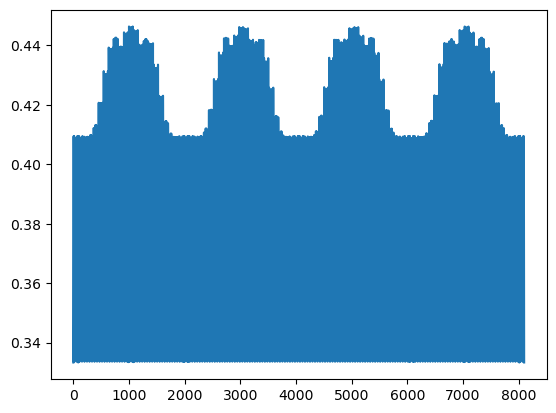

In [17]:
plt.plot(temp)

In [18]:
mesolve(L1,psi0,linspace(0,pi,5),[],[]).states[-1]-mesolve(L1,psi0,linspace(0,pi,10),[],[]).states[-1]

Quantum object: dims = [[3, 3, 3, 3], [3, 3, 3, 3]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[ 3.73634710e-08+0.00000000e+00j  0.00000000e+00-2.50398567e-08j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  3.42657569e-09+0.00000000e+00j]
 [ 0.00000000e+00+2.50398567e-08j -3.22236078e-08+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+1.26938728e-09j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00